<a href="https://colab.research.google.com/github/velmadee/deeksha/blob/main/student_maths_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load dataset
df = pd.read_csv('stud.csv')

In [ ]:
print("\n--- Dataset Information ---")
print(df.info())



--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [ ]:
#check Missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
#check duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
#data types
print(df.dtypes)


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [ ]:
print("\n--- Number of Unique Values in Each Column ---")
print(df.nunique())



--- Number of Unique Values in Each Column ---
gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64


In [ ]:
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


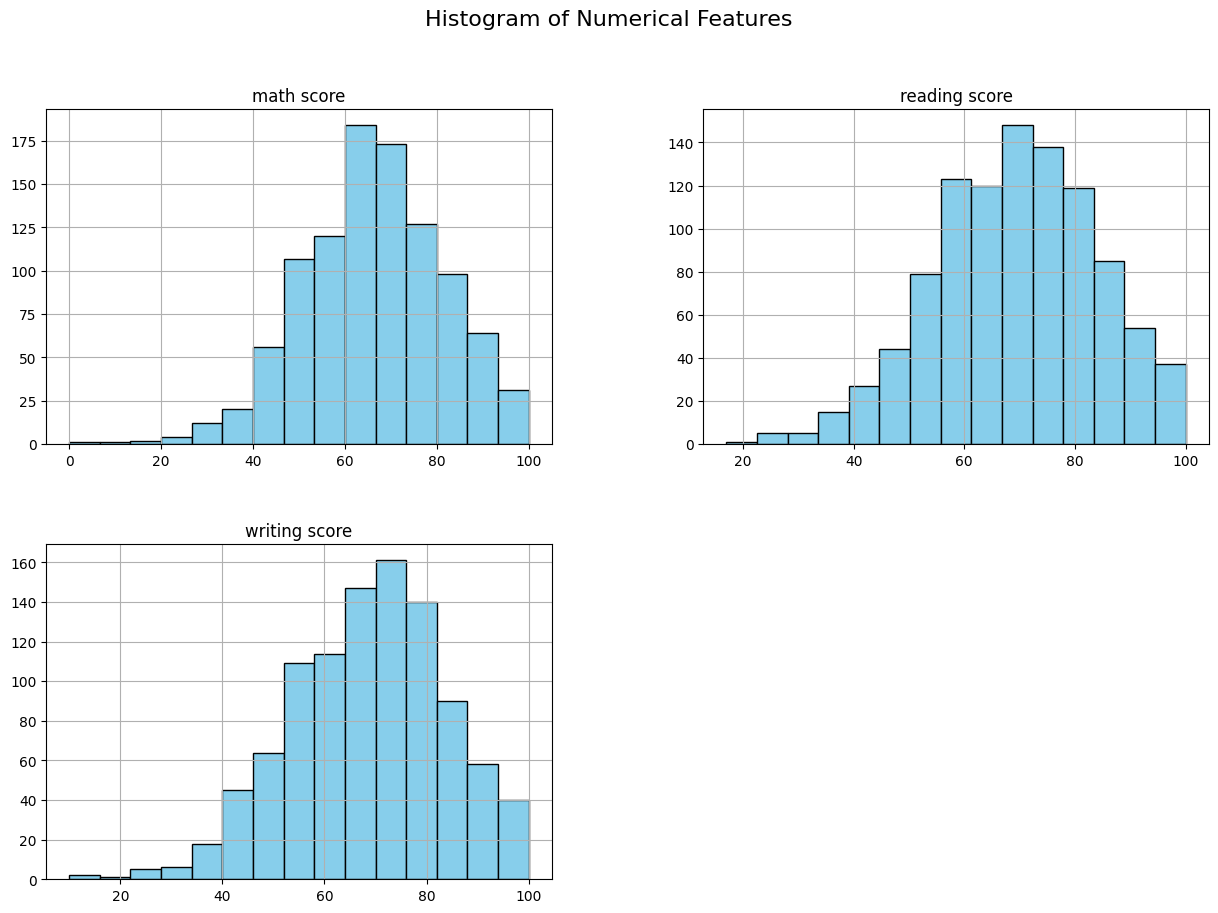

In [ ]:
# Plot histograms
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.show()

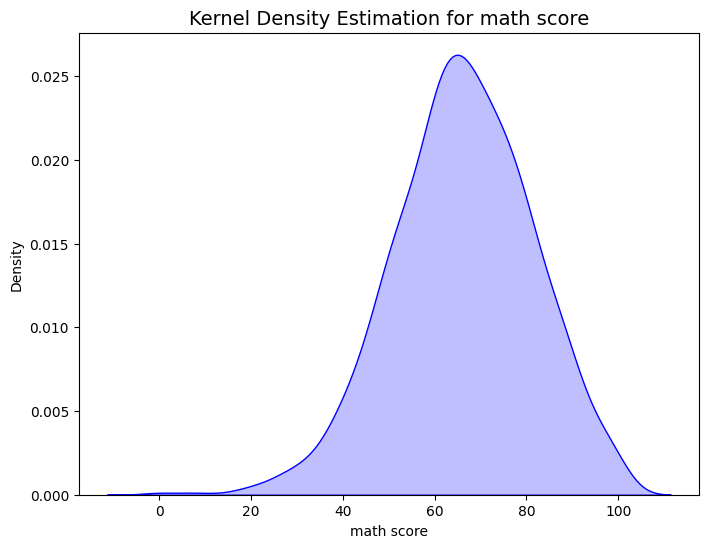

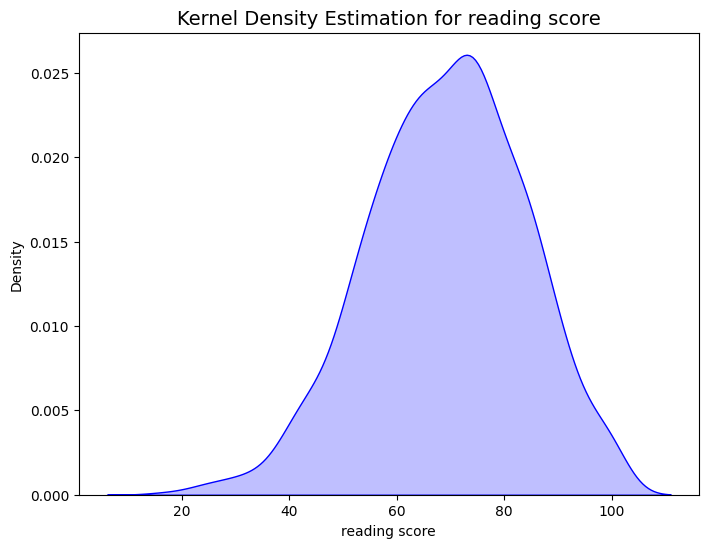

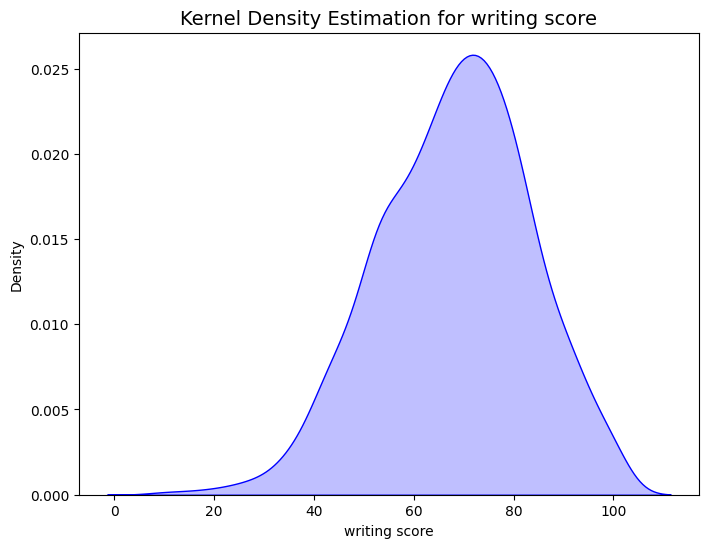

In [ ]:
# Plot KDE for numerical features
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[col], shade=True, color='blue')
    plt.title(f'Kernel Density Estimation for {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

In [ ]:
# Check unique values for categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_columns:
    print(f"Categories in '{col}': {df[col].unique()}")

Categories in 'gender': ['female' 'male']
Categories in 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch': ['standard' 'free/reduced']
Categories in 'test preparation course': ['none' 'completed']


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['math score'])
y = df['math score']

In [ ]:
# Separate numerical and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)

In [ ]:
# Transform features
X = preprocessor.fit_transform(X)
print(f"Transformed feature matrix shape: {X.shape}")


Transformed feature matrix shape: (1000, 14)


In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (800, 14), Testing set shape: (200, 14)


In [ ]:
# Evaluation function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}


In [ ]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    mae, rmse, r2 = evaluate_model(y_test, y_test_pred)
    results.append({"Model Name": name, "MAE": mae, "RMSE": rmse, "R2 Score": r2})


In [ ]:
# Display results
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("\nModel Performance:")
print(results_df)



Model Performance:
                Model Name       MAE      RMSE  R2 Score
2                    Ridge  4.212515  5.393586  0.880451
0        Linear Regression  4.214763  5.393994  0.880433
5  Random Forest Regressor  4.654150  5.980178  0.853034
7       AdaBoost Regressor  4.858333  6.256559  0.839135
1                    Lasso  5.157879  6.519688  0.825320
6             XGBRegressor  5.131190  6.601225  0.820924
3    K-Neighbors Regressor  5.713000  7.364360  0.777126
4            Decision Tree  6.520000  8.147392  0.727211


In [ ]:
# Choose the best model (Linear Regression in this case) for further analysis
best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = r2_score(y_test, y_pred) * 100
print(f"\nAccuracy of the best model: {accuracy:.2f}%")



Accuracy of the best model: 88.04%


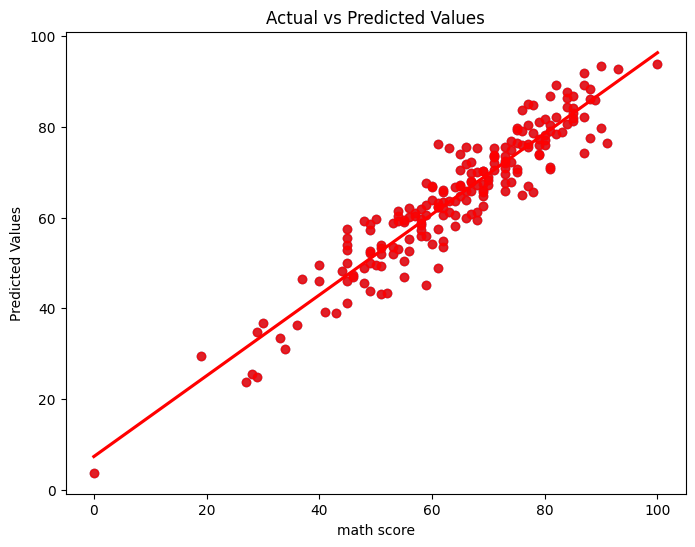

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.show()


In [ ]:
# Difference between actual and predicted values
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})
print("\nActual vs Predicted Values:")
print(pred_df.head())


Actual vs Predicted Values:
     Actual Value  Predicted Value  Difference
521            91        76.387970   14.612030
737            53        58.885970   -5.885970
740            80        76.990265    3.009735
660            74        76.851804   -2.851804
411            84        87.627378   -3.627378


In [ ]:
def final_prediction_flow():
    print("\n--- Final Prediction Flow ---")
    print("Provide the necessary inputs to predict the math score:")

    gender = input("Gender (male/female): ").strip().lower()
    race_ethnicity = input("Race/Ethnicity (e.g., group A, group B): ").strip()
    parental_level_of_education = input("Parental Level of Education (e.g., bachelor's degree, high school): ").strip()
    lunch = input("Lunch Type (standard/free/reduced): ").strip().lower()
    test_preparation_course = input("Test Preparation Course (completed/none): ").strip().lower()
    reading_score = float(input("Reading Score: ").strip())
    writing_score = float(input("Writing Score: ").strip())

    input_data = {
        'gender': [gender],
        'race/ethnicity': [race_ethnicity],
        'parental level of education': [parental_level_of_education],
        'lunch': [lunch],
        'test preparation course': [test_preparation_course],
        'reading score': [reading_score],
        'writing score': [writing_score]
    }

    df = pd.DataFrame(input_data)
    df_processed = preprocessor.transform(df)
    prediction = model.predict(df_processed)
    print(f'Predicted Math Score: {prediction[0]:.2f}')

# Uncomment the following to run the final prediction flow
final_prediction_flow()


--- Final Prediction Flow ---
Provide the necessary inputs to predict the math score:
Gender (male/female): male
Race/Ethnicity (e.g., group A, group B): group C
Parental Level of Education (e.g., bachelor's degree, high school): some college
Lunch Type (standard/free/reduced): standard
Test Preparation Course (completed/none): none
Reading Score: 78
Writing Score: 75
Predicted Math Score: 77.91
